## Image Captioning

In [ ]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tokenizer
!pip install transformers

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os
#using the model nlpconnect/vit-gpt2-image-captioning
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}



In [ ]:
#function to predict the caption for image
def predict_step(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds

# Path to the directory containing images
image_directory = '/content/drive/MyDrive/AI-Level-6/week-7/images'
extension= ('.jpg', '.png', '.jpeg','.JPG')

# Get a list of image file paths in the directory
image_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.endswith(extension)]

# Call the predict_step function with multiple images
captions = predict_step(image_paths)

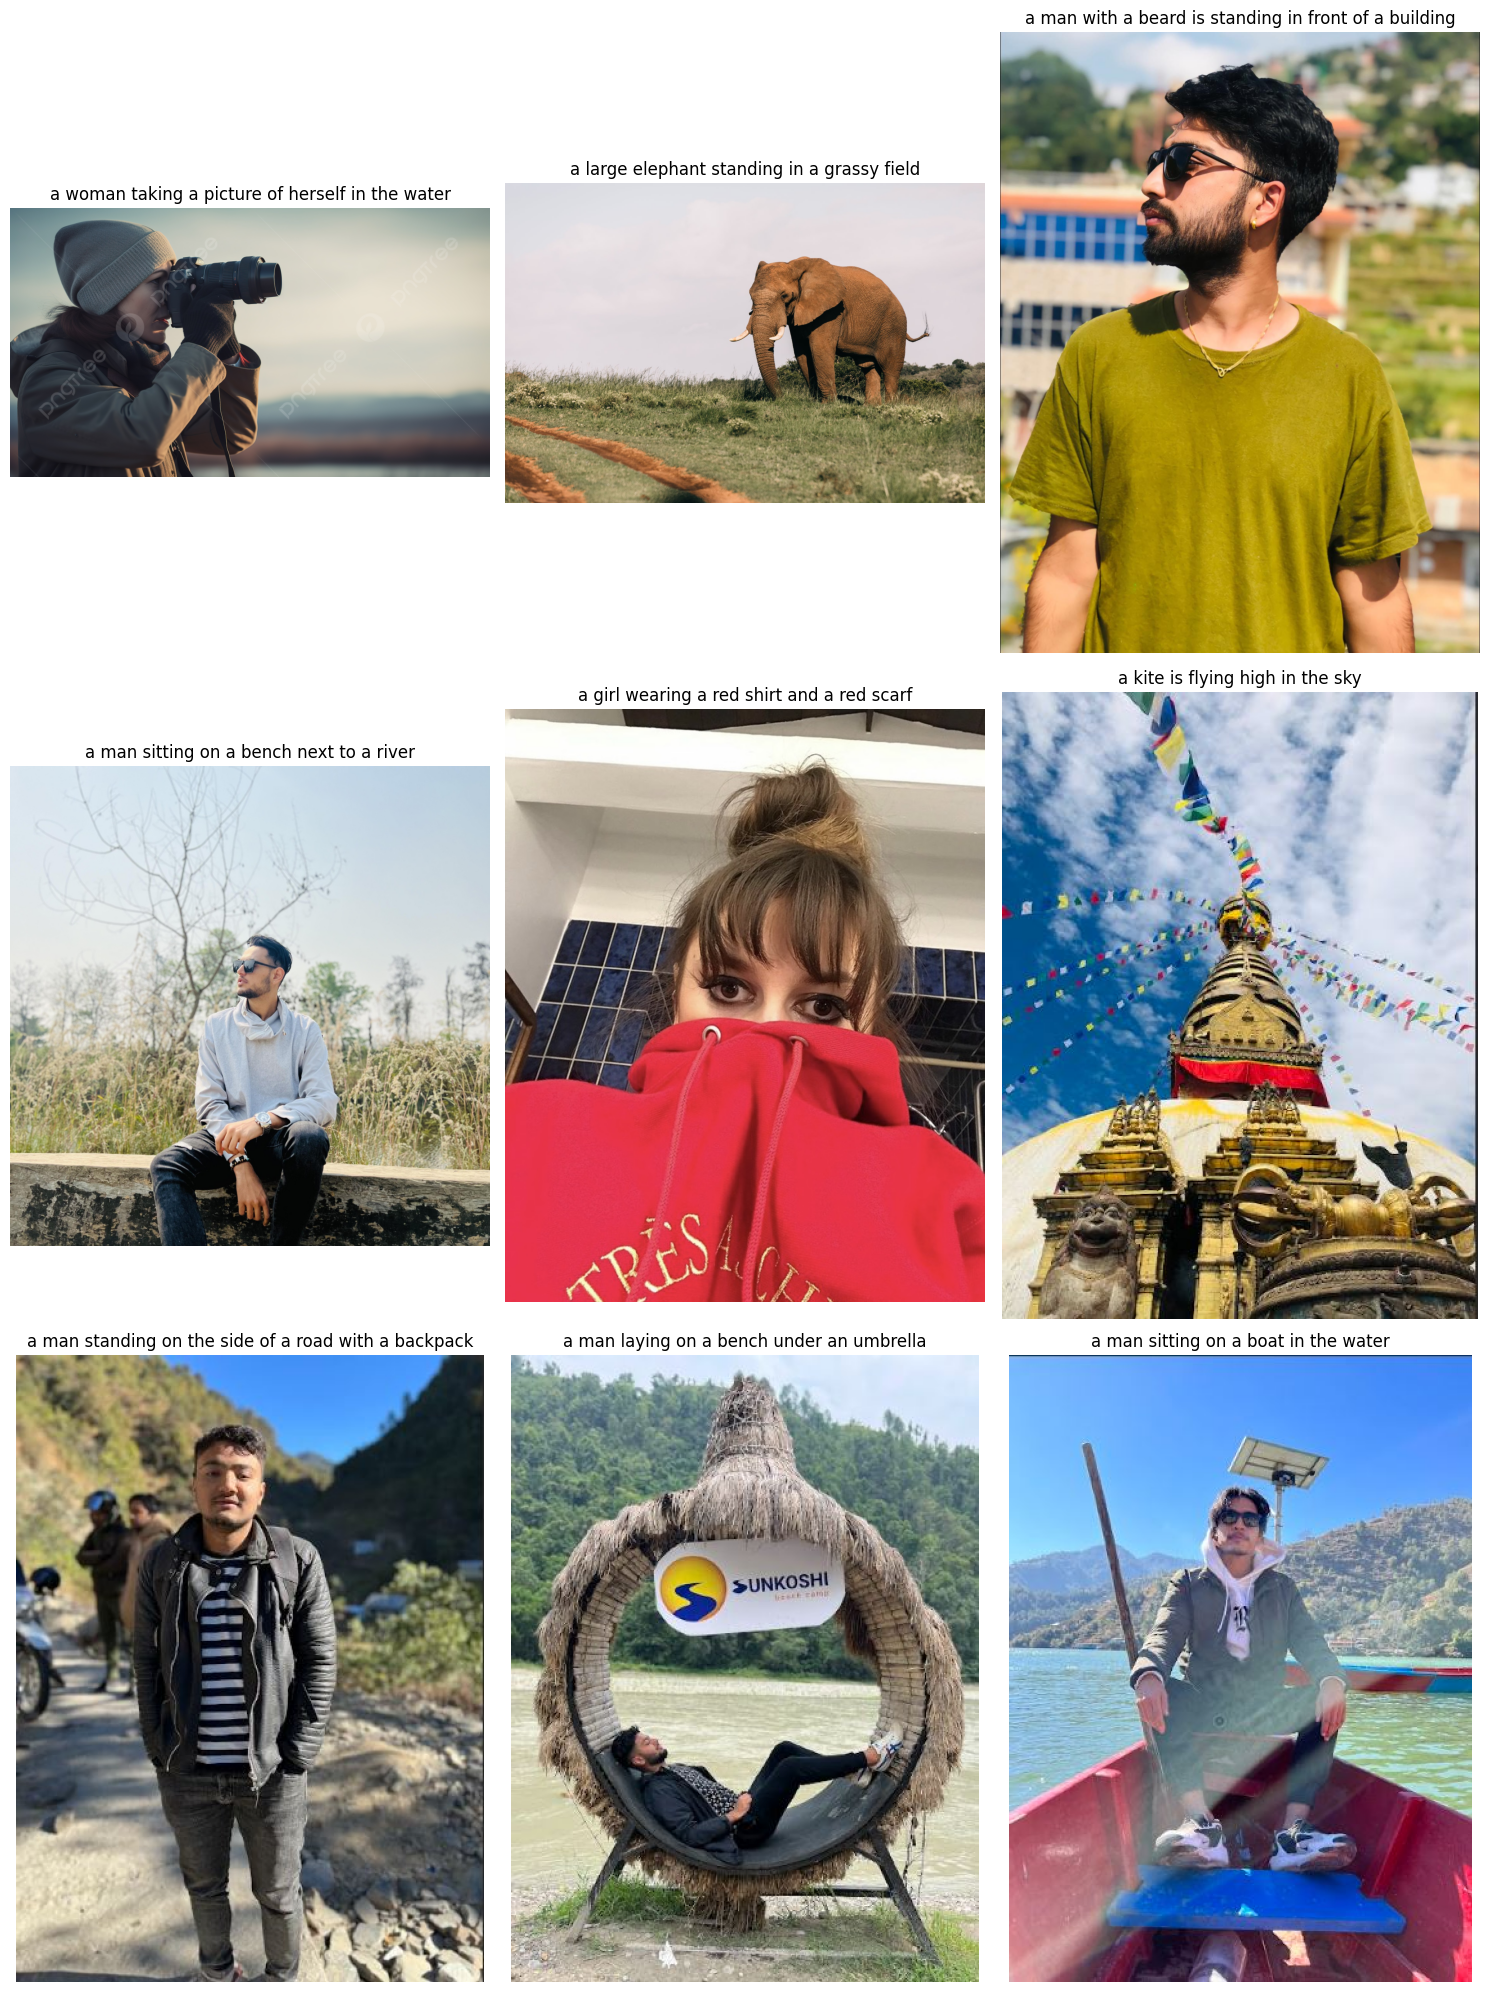

In [34]:
# Display images along with captions in a 3x3 grid
num_images = len(image_paths)
num_rows = 3
num_cols = 3

fig = plt.figure(figsize=(15, 20))

for i, (image_path, caption) in enumerate(zip(image_paths, captions)):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.set_title(caption)
    ax.axis('off')

plt.tight_layout()
plt.show()